<a href="https://colab.research.google.com/github/PRITHASAMANTA/Data-Science-Material/blob/main/ML_Day_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUPERVISED ML:
     

#Regression Analysis: type of supervised ml
    #1.Linear Reg:
         assume linear relationship betw dependent and independent var
         - y=b0+b1x1+b2x2+...bnxn+ e
          b0= intercept,
          b1=slope,
          e= error
          steps:
          1.fit the model
          2.predict
          3.evaluate
    #Cost Function:
         Linear reg aims to minimize the error btw the predicated and actual values.this is achieved using cost function
    # Cost Function measures how far the predictions are from the actual values
    # most common cost func is : mean squared error
    j(b0,b1)=1/m(sumation(yi-(b0+b1x))^2)
      m=no of data points
      y1= actual values
      b0_b1x=predicted values
    objective: minimize j(b0,b1) to find the best fitting lines



# Ex 1: Implement a simple Linear Regression model using Scikt_learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [23]:

x = np.random.rand(100,1)*100  # all are giving random values.it will provide 1,100 random values
x

array([[ 5.16817212],
       [53.13546316],
       [54.06351216],
       [63.74299015],
       [72.60913337],
       [97.58520795],
       [51.63003483],
       [32.29564729],
       [79.51861948],
       [27.08322513],
       [43.89714207],
       [ 7.84563813],
       [ 2.53507434],
       [96.26484147],
       [83.59801205],
       [69.59742061],
       [40.89529444],
       [17.32943201],
       [15.64370427],
       [25.02428982],
       [54.92266647],
       [71.45959227],
       [66.01973767],
       [27.99338969],
       [95.48652807],
       [73.78969167],
       [55.43540525],
       [61.17207462],
       [41.96000624],
       [24.77309895],
       [35.59726787],
       [75.78461105],
       [ 1.43934886],
       [11.60726405],
       [ 4.6002642 ],
       [ 4.07288023],
       [85.5460584 ],
       [70.36578594],
       [47.41738291],
       [ 9.78341607],
       [49.16158751],
       [47.34717708],
       [17.32018699],
       [43.38516492],
       [39.85047344],
       [61

In [16]:
#Generate synthetic data
np.random.seed(42)
x = np.random.rand(100,1) *100
y = 3 * x + np.random.rand(100,1)*2

Let’s break this code down line by line 👇

---

### 1️⃣ `np.random.seed(42)`

This **sets the random seed** for NumPy’s random number generator.

✅ Meaning: It ensures that every time you run the code, you’ll get the **same random numbers** (for reproducibility).
If you remove this line, the numbers will change each time.

💡 If you want whole numbers instead:

You can use np.random.randint() instead of np.random.rand().

Example:

x = np.random.randint(0, 100, (100, 1))


That gives you 100 random integers between 0 and 99 (inclusive), like:

[[37],
 [95],
 [73],
 ...
 [8]
---

### 2️⃣ `x = np.random.rand(100, 1) * 100`

* `np.random.rand(100, 1)` creates a **100×1 array** of random numbers between **0 and 1**.
* Multiplying by `100` scales these values to be between **0 and 100**.

✅ So, `x` is a column vector with 100 random values in `[0, 100)`.

Example:

```
x = [[37.45],
     [95.07],
     [73.20],
     ...
    ]
```

---

### 3️⃣ `y = 3 * x + np.random.rand(100, 1) * 2`

Here we’re **creating a dependent variable `y`** based on `x`.

* The main term `3 * x` means we’re assuming a linear relationship where the slope is 3.
* `np.random.rand(100, 1) * 2` adds **a small random noise** between `0` and `2`.

✅ So, mathematically:
[
y = 3x + \text{small random noise}
]

This simulates **real-world data** where `y` depends linearly on `x` but has some randomness (like measurement errors).






In [24]:
#Split the data

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

 #fit linear reg
model = LinearRegression()
model.fit(X_train,Y_train)

🧩 What’s happening here:

LinearRegression() creates an empty model object.

model.fit(X_train, Y_train) means:

Fit (or train) the model using your training data.

It calculates the best slope (m) and intercept (c) so that the line y = mx + c best fits the data.

👉 Internally, it uses least squares method to minimize the error between actual Y_train and predicted values.

In [28]:
#fit linear reg
model = LinearRegression()
model.fit(X_train,Y_train)

#Make predictions
Y_pred = model.predict(X_test)

print("Slopes (coefficients): ", model.coef_)


print("Intercept: ", model.intercept_)

# #print co efficients
print("slope is : ", model.coef_[0][0])
print("intercept is : ", model.intercept_[0])

Slopes (coefficients):  [[-0.49163585]]
Intercept:  [166.58150771]
slope is :  -0.4916358530699066
intercept is :  166.58150770698836


model.coef_[0][0] = 2.1(ex) (slope for feature 1)

model.coef_[0][1] = 3.4 (slope for feature 2)
  
model.coef_[0][2] = -1.2 (slope for feature 3)

but when u have only one feature, then u can use   
###print("Slopes (coefficients): ", model.coef_)  
as intercept is same so you can use :
print("Intercept: ", model.intercept_)  for all

#Why interception is same?


### 🔹 Step 1: Recall the general equation

For **multiple** linear regression with 3 input variables (features):

[
\hat{y} = m_1x_1 + m_2x_2 + m_3x_3 + c
]

where:

* ( x_1 = ) size (sqft)
* ( x_2 = ) bedrooms
* ( x_3 = ) age
* ( m_1, m_2, m_3 ) are **slopes (coefficients)** for each variable
* ( c ) is the **intercept**

---

### 🔹 Step 2: What each coefficient means

Each slope tells **how much y changes when that variable changes by 1 unit**, **keeping others constant**.

Example:

* ( m_1 = 0.2 ) → if size increases by 1 sqft (while bedrooms & age fixed), price increases by 0.2 thousand.
* ( m_2 = -0.86 ) → if bedrooms increase by 1 (keeping size & age fixed), price decreases by 0.86 thousand.
* ( m_3 = -0.80 ) → if age increases by 1 year (keeping others fixed), price decreases by 0.80 thousand.

So yes — ✅ you get **different slope values for each x variable** because each has its own effect on y.

---

### 🔹 Step 3: But why **only one intercept**?

Think of the intercept ( c ) as the **baseline y** —
the value of y when **all x’s = 0**.

[
value of y, when  x_1=x_2=x_3=0
]

#* It’s **one single point** where the regression plane (in 3D) crosses the y-axis.
#* No matter how many x’s you have, the line or plane has **only one intercept** — it’s the starting point from which all slopes add or subtract their contributions.





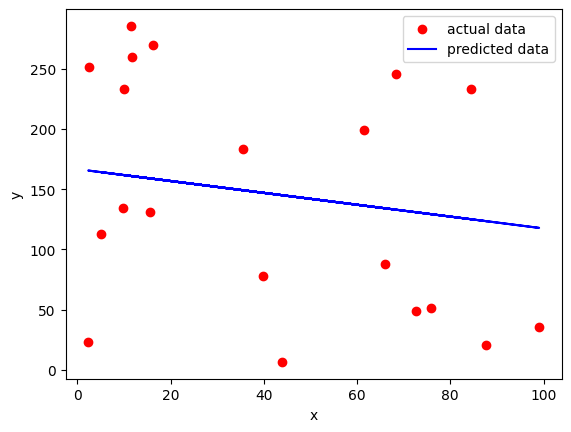

In [29]:
#visualize performence
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color='red',label='actual data')
plt.plot(X_test,Y_pred,color='blue',label='predicted data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [31]:
#Evaluate performence
mse= mean_squared_error(Y_test,Y_pred)
print("MSE",mse)
r2=r2_score(Y_test,Y_pred)
print("R2",r2)

MSE 7989.336056471962
R2 0.10148850003400123
